## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

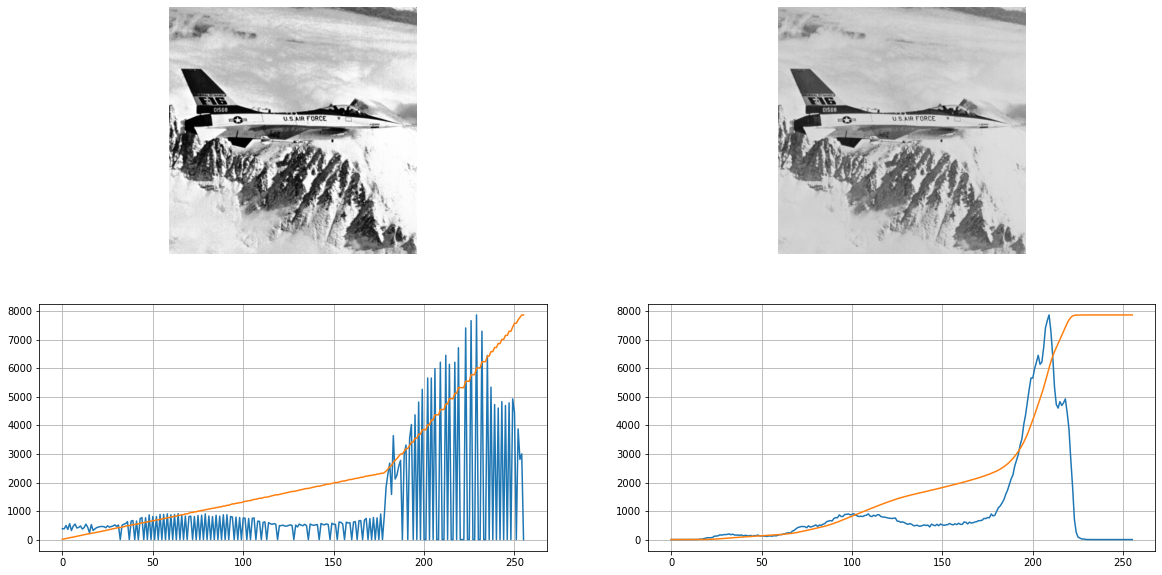

In [ ]:
I = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([I], [0], None, [256], [0, 256])
hist_acc = hist.cumsum()

lm = int(np.mean(I))
hist_acc_lower = hist[:(lm + 1)].cumsum()
hist_acc_upper = hist[(lm + 1):].cumsum()

hist_acc_lower = ((hist_acc_lower / np.max(hist_acc_lower)) * lm).astype("uint8")
hist_acc_upper = ((hist_acc_upper / np.max(hist_acc_upper)) * (255 - lm - 1) + lm + 1).astype("uint8")

lut_func = np.concatenate((hist_acc_lower, hist_acc_upper)).astype("uint8")

I_masked = np.ma.masked_equal(I, 0).astype("uint8")

I_eq = cv2.LUT(I_masked, lut_func)
I_eq = np.ma.filled(I_eq, 0)
hist_eq = cv2.calcHist([I_eq], [0], None, [256], [0, 256])
hist_eq_acc = hist_eq.cumsum()

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 10)

axs[0, 0].imshow(I_eq, "gray", vmin=0, vmax=255)
axs[0, 0].axis("off")

axs[0, 1].imshow(I, "gray", vmin=0, vmax=255)
axs[0, 1].axis("off")

axs[1, 0].plot(hist_eq)
axs[1, 0].plot(hist_eq_acc * hist_eq.max() / hist_eq_acc.max())
axs[1, 0].grid()

axs[1, 1].plot(hist)
axs[1, 1].plot(hist_acc * hist.max() / hist_acc.max())
axs[1, 1].grid()